In [6]:
import pandas as pd
import numpy as np

In [7]:
dfOuranno = pd.read_csv('AlarmsInfo.csv',sep=',')
print(np.shape(dfOuranno))
dfOuranno.head()

(912, 16)


,RecordNum,PatientId,ICUStayId,Duration,Category,nRRraw,nRRfilt,nSpO2raw,nSpO2filt,nRD,fRR_b24,fRR_a24,fSP_b24,fSP_a24,fRD,Lead
0,3887555,79,290076,38.200000,D,12,0,23,1,0,NaN,NaN,11.433333,NaN,NaN,NaN
1,3647298,85,291697,45.316667,B,191,1,8,0,0,1.0,NaN,NaN,NaN,NaN,NaN
2,3485814,123,227264,34.000000,C,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3991520,124,255660,53.016667,F,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3807277,124,255660,32.316667,F,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
NREC = np.shape(dfOuranno)[0]
# p RR alarm Raw
# q SP alarm Raw
# x RR alarm refined
# y SP alarm refined
# t duration
# c count
p = 0
P = 0
q = 0
Q = 0
x = 0
X = 0
y = 0
Y = 0
t = 0
T = 0
c = 0
C = 0
for i in range(NREC):
    if(dfOuranno.loc[i,'Category']=='C' or dfOuranno.loc[i,'Category']=='F'):
        p = p + dfOuranno.loc[i,'nRRraw']
        q = q + dfOuranno.loc[i,'nSpO2raw']
        x = x + dfOuranno.loc[i,'nRRfilt']
        y = y + dfOuranno.loc[i,'nSpO2filt']
        t = t + dfOuranno.loc[i,'Duration']
        c = c + 1
    if(dfOuranno.loc[i,'Category']=='X' or dfOuranno.loc[i,'Category']=='A' or dfOuranno.loc[i,'Category']=='B' or dfOuranno.loc[i,'Category']=='D' or dfOuranno.loc[i,'Category']=='E'):
        P = P + dfOuranno.loc[i,'nRRraw']
        Q = Q + dfOuranno.loc[i,'nSpO2raw']
        X = X + dfOuranno.loc[i,'nRRfilt']
        Y = Y + dfOuranno.loc[i,'nSpO2filt']
        T = T + dfOuranno.loc[i,'Duration']
        C = C + 1
print(t)
print(c)
print(T)
print(C)   

9744.433333333338
251
35074.866666666654
661


In [10]:
print('For stable cases')
print('RR Alarms Raw ' + str(p) + '   Average '+str(p*24/t))
print('SP Alarm Raw ' + str(q) + '   Average '+str(q*24/t))
print('RR Alarm Refined ' + str(x) + '   Average '+str(x*24/t))
print('SP Alarm Refined ' + str(y) + '   Average '+str(y*24/t))

print('For non-stable cases')
print('RR Alarms Raw ' + str(P) + '   Average '+str(P*24/T))
print('SP Alarm Raw ' + str(Q) + '   Average '+str(Q*24/T))
print('RR Alarm Refined ' + str(X) + '   Average '+str(X*24/T))
print('SP Alarm Refined ' + str(Y) + '   Average '+str(Y*24/T))

For stable cases
RR Alarms Raw 8928   Average 21.989169885028364
SP Alarm Raw 1798   Average 4.428374490734879
RR Alarm Refined 22   Average 0.05418478242278495
SP Alarm Refined 4   Average 0.009851778622324536
For non-stable cases
RR Alarms Raw 99760   Average 68.26084394713786
SP Alarm Raw 23660   Average 16.18937016629192
RR Alarm Refined 909   Average 0.6219838326779101
SP Alarm Refined 431   Average 0.2949120262752247


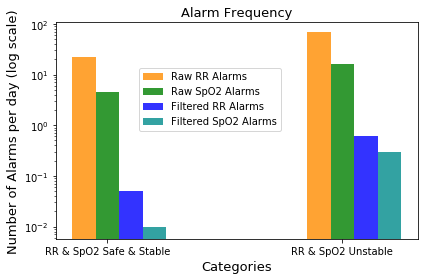

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
p = (21.99, 68.26)
q = (4.43, 16.19)
x = (0.05, 0.62)
y = (0.01, 0.29)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

ax.set_yscale('log')
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='darkorange',
                 label='Raw RR Alarms')
 
rects2 = plt.bar(index + bar_width, q, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Raw SpO2 Alarms')

rects3 = plt.bar(index + 2*bar_width, x, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Filtered RR Alarms')
 
rects4 = plt.bar(index + 3*bar_width, y, bar_width,
                 alpha=opacity,
                 color='darkcyan',
                 label='Filtered SpO2 Alarms')
 


plt.xlabel('Categories',fontdict={'fontsize': 13})
plt.ylabel('Number of Alarms per day (log scale)',fontdict={'fontsize': 13})
plt.title('Alarm Frequency',fontdict={'fontsize': 13})
plt.xticks(index + bar_width, ('RR & SpO2 Safe & Stable','RR & SpO2 Unstable'))
plt.legend(loc=(0.23,0.5))
 
plt.tight_layout()
plt.show()